# Classificação - Spambase

[Dataset (OpenML)](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=44)

## Carregamento do dataset

In [2]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=44)

## Metadados do dataset

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
from pandas import DataFrame, Series

features: DataFrame = dataset['data']
target: Series = dataset['target']

features.shape, target.shape

((4601, 57), (4601,))

In [5]:
X, y = dataset.data, dataset.target

In [6]:
target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: category
Categories (2, object): ['0', '1']

## Treinamento do modelo

In [7]:
from sklearn.linear_model import LogisticRegression

# Seleciona apenas features numéricas
features = features.select_dtypes(include=['number'])

model = LogisticRegression(max_iter=1500)
model.fit(features, target)
predicted = model.predict(features)

## Visualização dos resultados

### Exibição de métricas

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target, predicted)
print('Accuracy:', accuracy)

intercept_value = model.intercept_
print('Intercept:', intercept_value)

coefficient = model.coef_
print('Coeficientes:', coefficient)

Accuracy: 0.9313192784177353
Intercept: [-1.47574469]
Coeficientes: [[-3.25579436e-01 -1.54257764e-01  1.29800751e-01  8.64860131e-01
   5.58080709e-01  7.60853619e-01  2.12810867e+00  5.81661808e-01
   6.59437189e-01  1.22871784e-01 -2.16837668e-01 -1.51307844e-01
  -6.70514822e-02  1.51841218e-01  9.65811763e-01  1.03149537e+00
   9.26661691e-01  1.25693178e-01  7.75343717e-02  9.74094429e-01
   2.51696846e-01  2.71105909e-01  2.16082664e+00  5.46432974e-01
  -1.76475603e+00 -1.01228828e+00 -3.79605447e+00  4.08828180e-01
  -1.35786476e+00 -3.45158731e-01 -4.50573855e-01 -5.01123565e-02
  -8.36529122e-01 -4.78595518e-02 -1.20585627e+00  7.92425562e-01
  -9.83737668e-03 -4.93165890e-01 -7.63610970e-01 -3.35523003e-01
  -1.50243526e+00 -1.89685392e+00 -8.37339939e-01 -1.40899780e+00
  -6.81386862e-01 -1.42180577e+00 -9.46888051e-01 -1.63982051e+00
  -1.13040172e+00 -1.35445741e-01 -4.92637386e-01  3.83774987e-01
   3.97058482e+00  1.23304774e+00 -1.30082823e-02  8.29865881e-03
   5.390

## Plot MSE em relação à variação do atributo 'intercept'

In [9]:

from typing import Tuple, List


def calc_error(delta=100) -> Tuple[List[float], List[float]]:
    _model = LogisticRegression(max_iter=500)
    _model.fit(features, target)

    intercept = _model.intercept_
    intercept_values = numpy.linspace(intercept - delta, intercept + delta, max(delta, 1000))
    mse_array = []

    for value in intercept_values:
        model.intercept_ = value
        y_predicted = model.predict(features)
        _score = accuracy_score(target, y_predicted)
        mse_array.append(_score)

    return mse_array, intercept_values

In [13]:
print(model.coef_)
print(model.intercept_)

[[-3.25579436e-01 -1.54257764e-01  1.29800751e-01  8.64860131e-01
   5.58080709e-01  7.60853619e-01  2.12810867e+00  5.81661808e-01
   6.59437189e-01  1.22871784e-01 -2.16837668e-01 -1.51307844e-01
  -6.70514822e-02  1.51841218e-01  9.65811763e-01  1.03149537e+00
   9.26661691e-01  1.25693178e-01  7.75343717e-02  9.74094429e-01
   2.51696846e-01  2.71105909e-01  2.16082664e+00  5.46432974e-01
  -1.76475603e+00 -1.01228828e+00 -3.79605447e+00  4.08828180e-01
  -1.35786476e+00 -3.45158731e-01 -4.50573855e-01 -5.01123565e-02
  -8.36529122e-01 -4.78595518e-02 -1.20585627e+00  7.92425562e-01
  -9.83737668e-03 -4.93165890e-01 -7.63610970e-01 -3.35523003e-01
  -1.50243526e+00 -1.89685392e+00 -8.37339939e-01 -1.40899780e+00
  -6.81386862e-01 -1.42180577e+00 -9.46888051e-01 -1.63982051e+00
  -1.13040172e+00 -1.35445741e-01 -4.92637386e-01  3.83774987e-01
   3.97058482e+00  1.23304774e+00 -1.30082823e-02  8.29865881e-03
   5.39037106e-04]]
[-1.47574469]


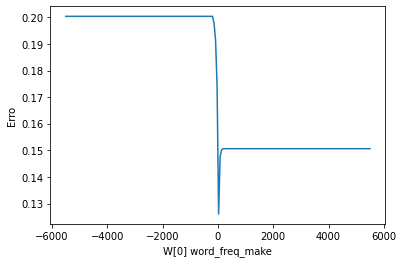

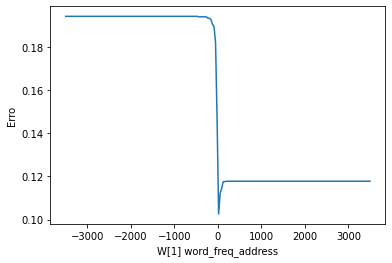

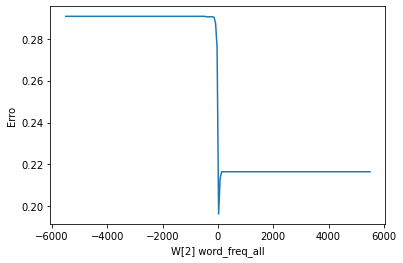

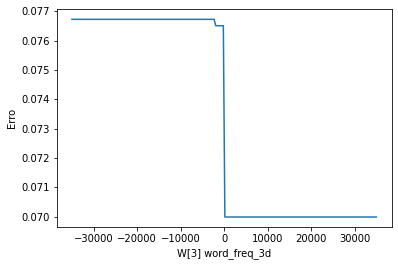

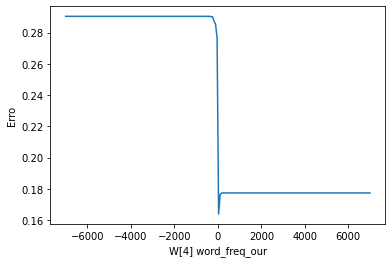

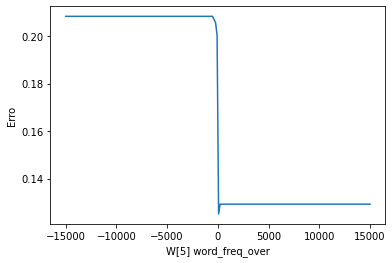

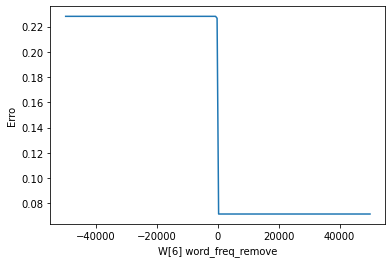

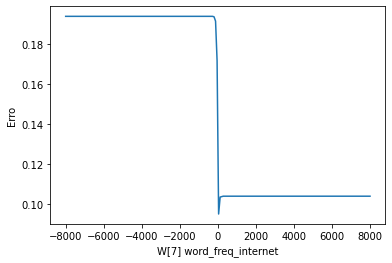

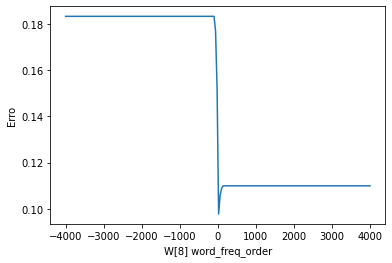

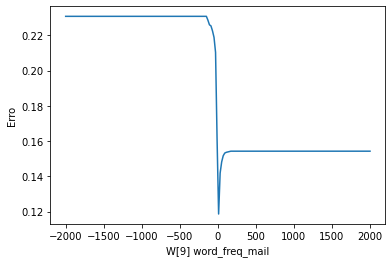

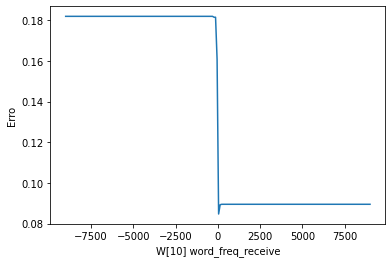

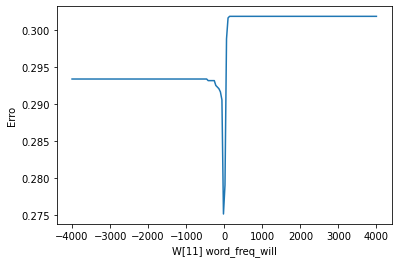

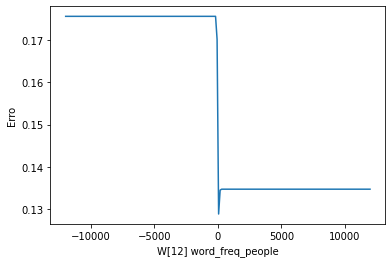

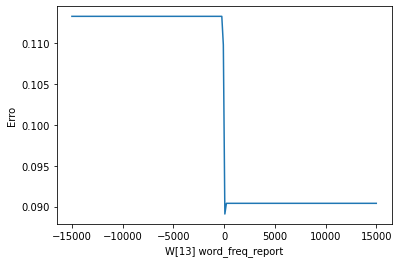

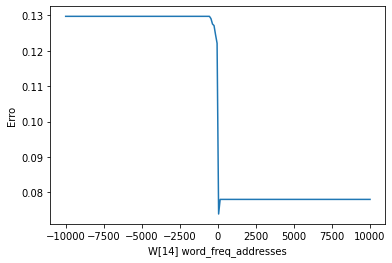

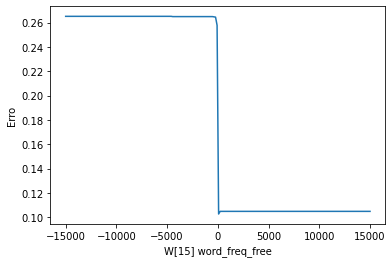

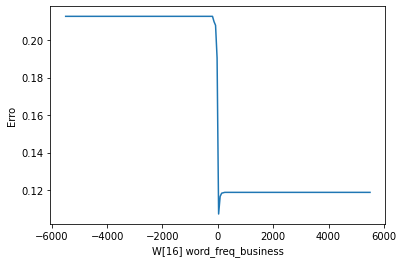

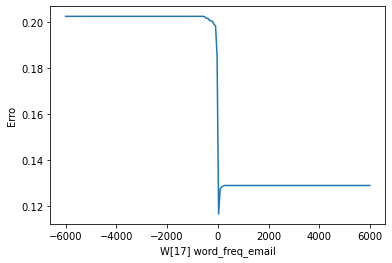

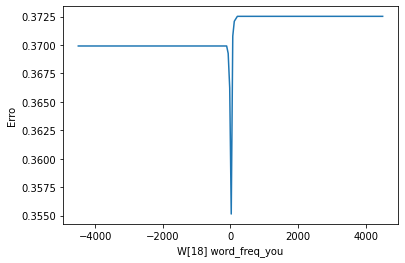

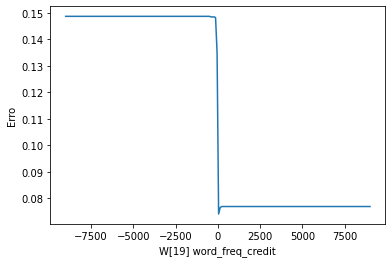

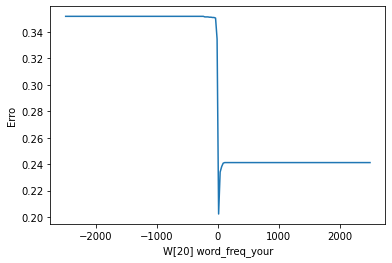

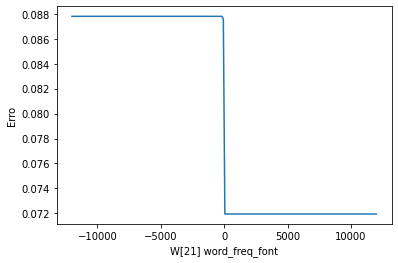

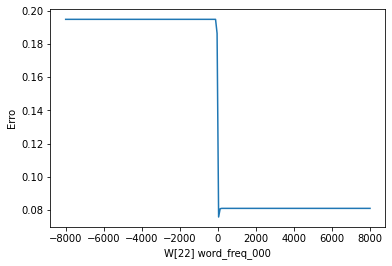

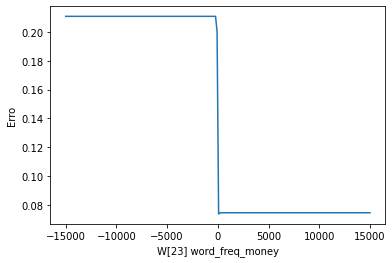

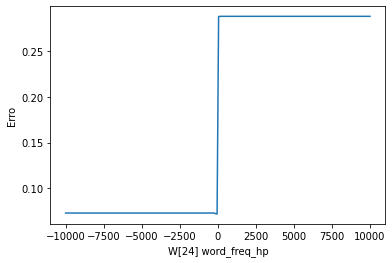

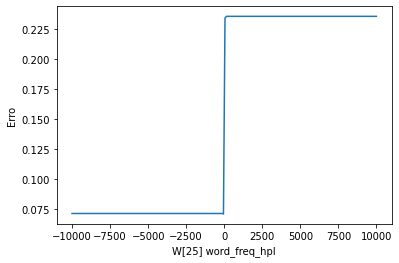

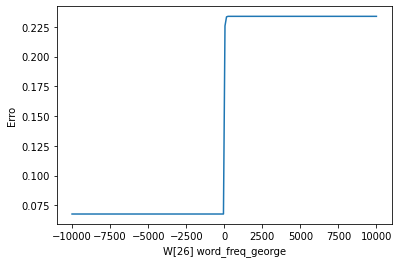

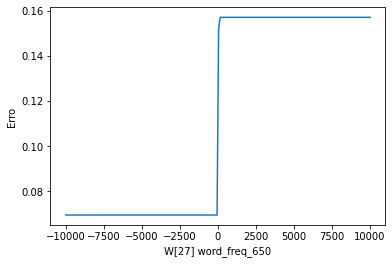

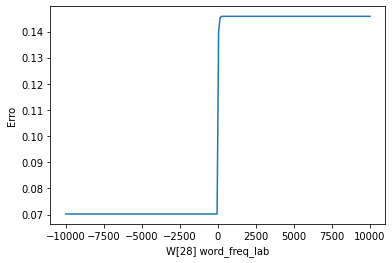

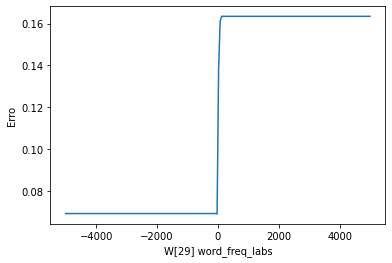

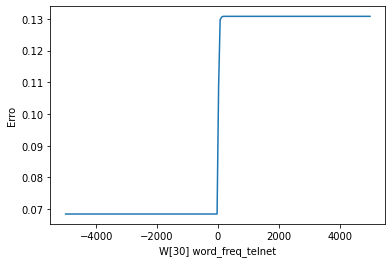

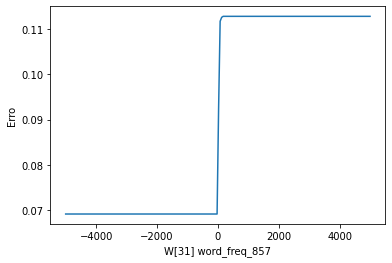

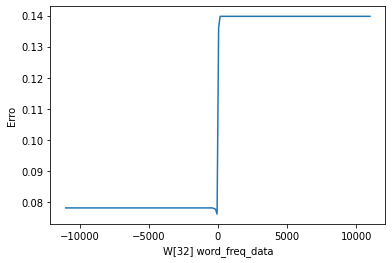

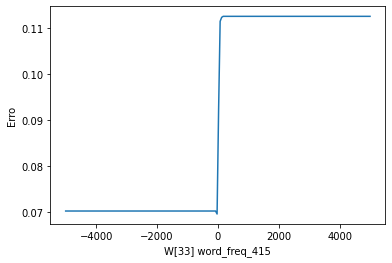

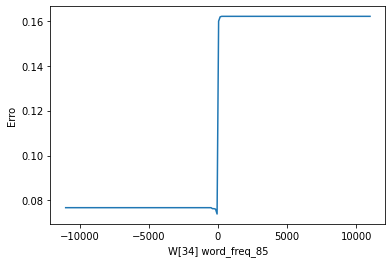

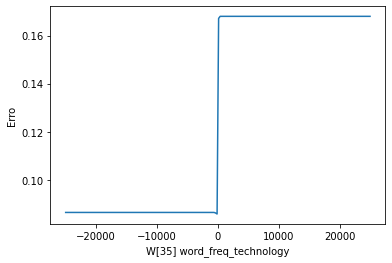

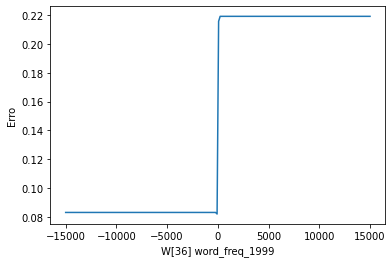

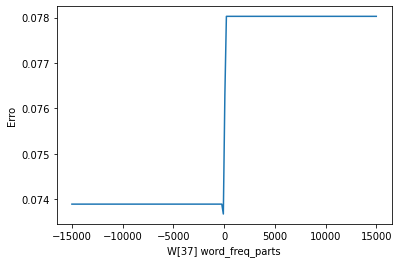

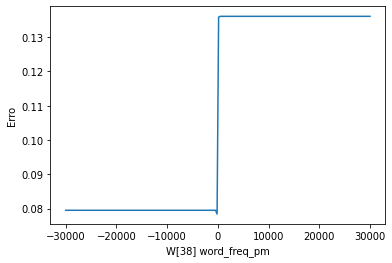

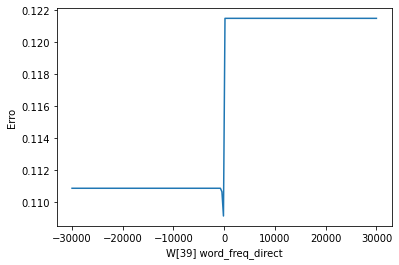

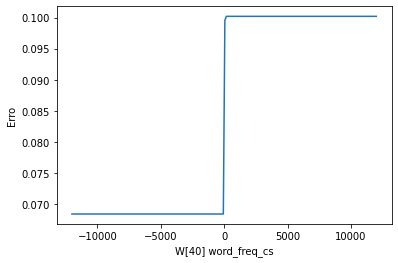

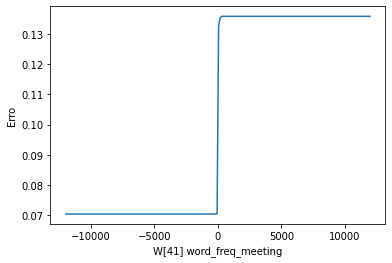

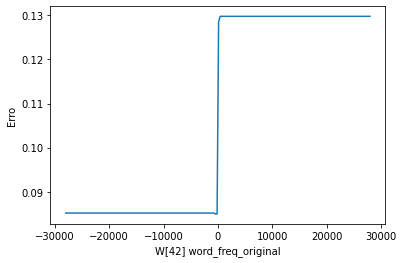

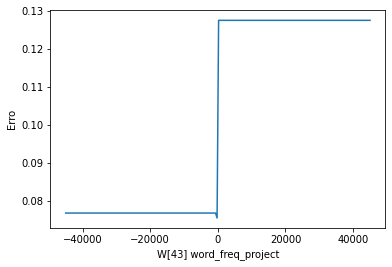

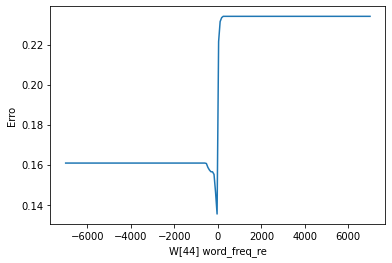

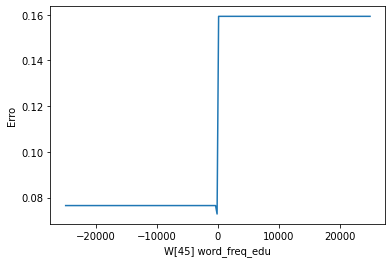

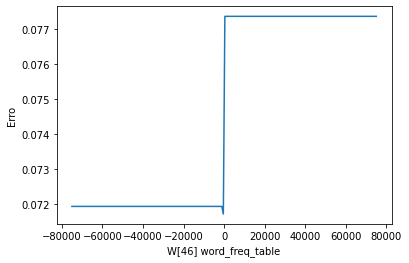

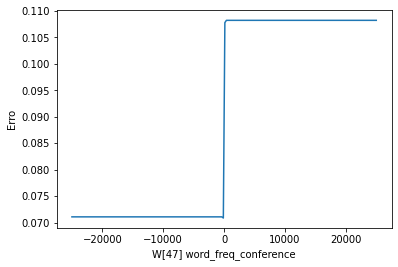

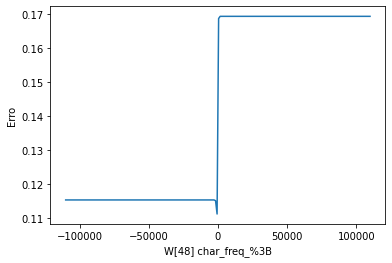

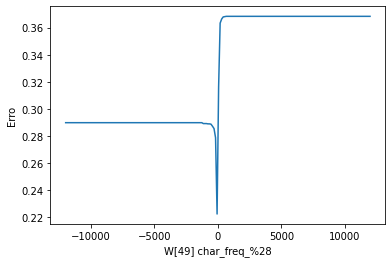

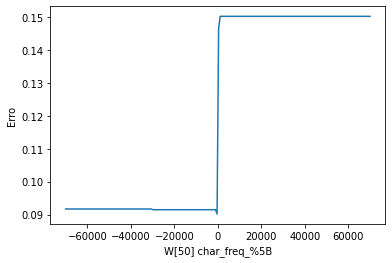

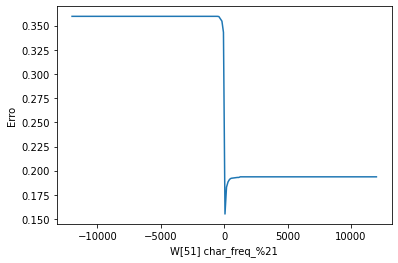

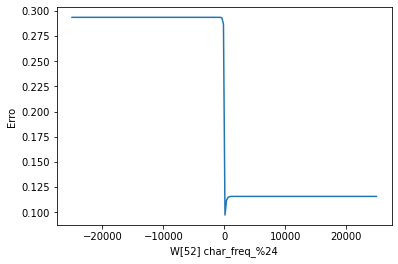

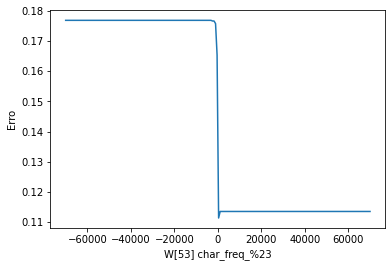

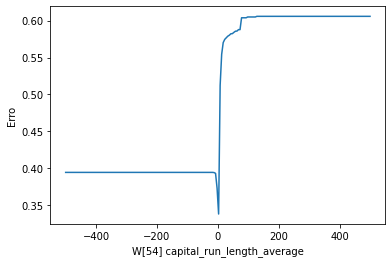

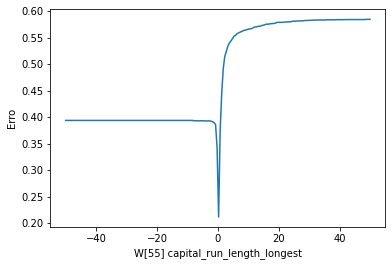

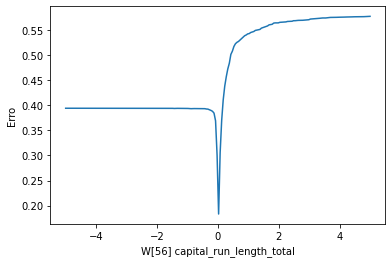

In [12]:

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy

deltas = [
    5500, 3500, 5500, 35000, 7000, 15000, 50000, 8000, 4000, 2000,
    9000, 4000, 12000, 15000, 10000, 15000, 5500, 6000, 4500, 9000,
    2500, 12000, 8000, 15000, 10000, 10000, 10000, 10000, 10000, 5000,
    5000, 5000, 11000, 5000, 11000, 25000, 15000, 15000, 30000, 30000,
    12000, 12000, 28000, 45000, 7000, 25000, 75000, 25000, 110000, 12000,
    70000, 12000, 25000, 70000, 500, 50, 5, 5, 5
]

def plot(index: int):
    erros = []
    coef = model.coef_[0][index]
    delta = deltas[index]
    ws = numpy.linspace(coef - delta, coef + delta, 200)
    for w in ws:
        model.intercept_[0][index] = w
        ypred = model.predict(features)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    model.coef_[0][index] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{index}] {X.keys()[index]}")
    plt.plot(ws, erros)
    plt.show()

max_index = len(model.coef_[0])

for i in range(max_index):
    plot(i)

In [ ]:
len(coefficient[0])